In [137]:
import SIA_faster as sia
import matplotlib.pylab as plt
import numpy as np
#from matplotlib.animation import FuncAnimation
from vialov import vialov

In [138]:
n = 3           # Glens flow law
rho = 910       # kg m^-3
A = 1e-16    # a^-1 Pa^-3 
g = 9.81        # m s^-2

In [139]:
# grid in x dir.
delta_x = 500
x_lim =16000        # L in Vialov Profil
x = np.arange(0,x_lim+delta_x,delta_x)

# time 
t_0=0
N=int(1e04)    # Nr. of time steps
delta_t=0.0005

In [140]:
# SMB 
a_s = 0.3#0.03 # m/a
via = vialov(x,x_lim,a_s,n,A,rho,g)

# Surface profile and bed
surface = via  #-0.001*x**2+20 #5*np.ones(np.size(x)) -0.00005*x**2+4000
#surface[len(surface)-1]=0
cut=10
x = x[0:len(x)-cut]
surface = surface[0:len(surface)-cut]
via=via[0:len(via)-cut]
bed = np.zeros(np.size(x)) #x_lim/200*np.sin(10/x_lim*x*np.pi)

# Flux boundary Condition 
boundary = np.array(((1,0),(1,-a_s*(x_lim-cut*delta_x))))

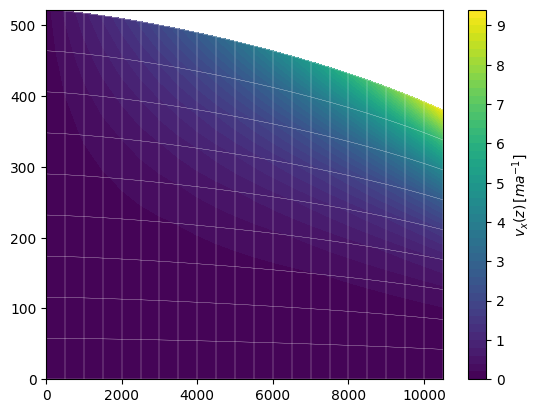

In [161]:
coef = 2*A/(n+2)*(rho*g)**n
nz=10
v_inner,Z=sia.velocity_x_inner(bed, surface, delta_x, nz,n,len(surface),coef)

X = np.tile(x[:len(x)-1],(nz,1))
Z=np.array([Z[i][:len(x)-1] for i in range(nz)])
fig,ax=plt.subplots()
#cp=ax.quiver(X,Z,v_inner,np.zeros(np.size(v_inner)))
cp = ax.contourf(X,Z,v_inner,50)
plt.colorbar(cp,label=r"$v_x(z)\, [ma^{-1}]$")

# Plot grid
for i in range(nz):
    plt.plot(x[:len(x)-1],Z[i],"-w",linewidth=0.2)
for i in range(len(x)-1):  
    plt.axvline(x[i],linestyle="-",color="white",linewidth=0.2)


### Check if the velocity correspondes to mean velocity from SIA code

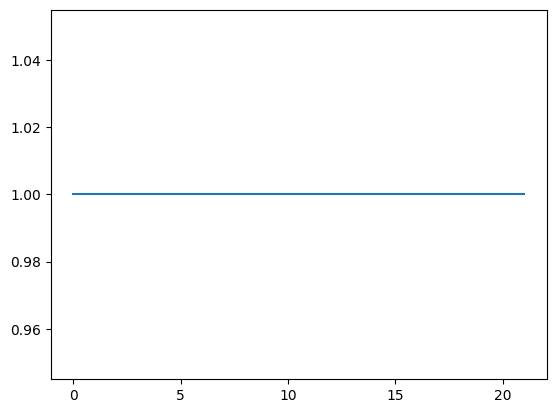

In [142]:
v_mean = sia.velocity_11(bed,surface,boundary,delta_x,n,len(surface),coef)
fig,ax = plt.subplots()
# v_mean_inner = np.zeros(np.size(v_mean))
# for i in range(len(Z[0])):
#     v_mean_inner[i] = sum([v_inner[j][i]*(Z[j][i]-Z[j-1][i]) for j in range(1,nz)])/(Z[nz-1][i]-Z[0][i])
# print(v_mean)
# print(v_mean_inner)
plt.plot(v_inner[nz-1]==v_mean[:len(v_mean)-1])


##### Top velocity from inner code = mean velocity from SIA code :/